<a href="https://colab.research.google.com/github/LucasRobles2323/ADA-Informes/blob/main/Informe10-KnapsackProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Programación Dinámica: Knapsack Problem**

**Entrada:** Peso y valor de varios elementos y el peso máximo que soporta la mochila.

**Salida:**  Máximo valor que se puede guardar en la mochila sin superar el peso máximo soportable.


##*Descripción del problema*

El problema consiste en conseguir el valor máximo que se puede tener en una mochila al ingresar artículos varios, para eso necesitamos los siguientes datos: 
* Un peso máximo que soporta la mochila.
* Precios y pesos individuales de diversos artículos.

Hay que considerar que la *mochila* solo puede ir guardando artículos si la suma de los pesos de dichos artículos no supera el peso máximo que soporta la *mochila*. 

La mochila puede guardar uno, varios o ningún articulo dependiendo de los pesos de los artículos. No es necesario habrá que igualar el peso sumado con el peso máximo que soporta la mochila.

Siempre que se tenga en consideración el peso, podemos realizar guardar cualquier cantidad de artículos sin necesidad de tener en cuenta sus tamaños, mientras buscamos la combinación con mayor precio, que podría ser guardar un único articulo caro o varios artículos más baratos, también es posible que la mochila no soporte ningún artículo.

# **2. Knapsack Problem: Problema de la mochila**

## **2.1. Descripción del algoritmo**

La tarea es encontrar el máximo precio que podemos obtener de lo que podemos guardar en una *mochila* con una **capacidad de peso máxima** dada, es decir, maximizar las ganancias al vender los elementos de la *mochila* teniendo el precio y peso de cada *articulo* guardado.

Por ejemplo, para el conjunto:
* valor = $[9, 21, 20, 100]$ 
* pesos = $[12, 13, 28, 50]$ 
* peso máximo = $53$.

Podemos meter los artículo con los pesos $12,13,28$ que en total hacen un valor de $53$, obteniendo justo un valor de $9+21+20=50$, pero podemos máximizar nuestras ganancias si simplemente colocamos el articulo que pesa $50$ en la *mochila* obteniendo el valor de $100$. 

Poner la mayor cantidad de articulos posibles en la mochila no asegura máximizar su valor.

Se busca maximizar el valor de la mochila, para eso se debe probar cada combinación de artículos posible.

###*Explicación de la **subestructura óptima** del problema.*

Para considerar todos los subconjuntos de elementos, puede haber dos casos para cada elemento y un caso base.

* El *caso base* seria la iteración $0$ o el peso máximo será $0$.
* El *artículo* considerado supera la capacidad ya sea por sí solo o agregándolo a la **mochila** máxima de la **mochila**, se considera la subestructura optima previa.
* El *artículo* considerado no supera la capacidad máxima, en cuyo caso debemos escoger el mayor precio entre la **mochila** que puede contener hasta el artículo a agregar **y** una *mochila* cuyo peso es el de la **mochila** menos el peso del artículo a agregar.

El algoritmo calcula el valor máximo para cada peso hasta llegar al peso de la mochila.


$m =$ matriz

$i =$ clave actual

$p =$ peso actual

$p[i] =$ peso del i-ésimo artículo

$m[i] =$ valor del i-ésimo artículo

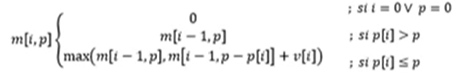

####**By:  https://drive.google.com/file/d/1SaJzo_GO4Az4nBoqlXS1hBqOYVdHJPWi/view?usp=sharing** 

El valor máximo para la *mochila* que resiste hasta un peso $W$, puede ser: 

* El valor máximo que tendría si su peso de resistencia fuera $W-1$ (caso anterior) si al agregar un artículo más se superara el peso $W$, es decir, el valor de la suma de los valores de $n-1$ ítems que tiene la *mochila* $W-1$ (caso anterior).

* Si al agregar un artículo no se supera el peso $W$ entonces su valor máximo sería el valor de la suma de los valores de $n$ ítems en la *mochila*.

###*Explicación del método **greedy** para el **problema de la mochila**.*

Es una solución más rápida y ligera para el problema, tanto su complejidad temporal como su complejidad espacial es menor a las del algoritmo **bottom-up** como solución.

Pero no es tan eficaz, en algunos casos falla, por ejemplo, con los siguientes datos. 

**Entrada:**
* $W = 180$
* $w = [40,60,80,180,360]$
* $v = [10,20,30,300,700]$

**Salida:**
* El máximo valor que podemos llevarnos en la mochila es de: 60


Como se puede ver dio $60$, pero podríamos haber insertado a la mochila únicamente el artículo que pesa $180$ y el valor llevado será $300$, mucho mayor que $60$.

$300 >> 60$. Esto ocurre porque el método **greedy** es ingenuo y optimista, en este caso asume que mientras más objetos llevemos, mayor será el valor llevado, y no siempre será asi.

## **2.2. Código**

###Util y necesario para los códigos

In [ ]:
# Caso donde ambos entregan la respuesta correcta.
W = 180
w = [12,25,43,100,160]
v = [100,200,300,400,450]

print(f"Peso máximo que soporta la mochila: {W}\n"+
      f"     Peso cada artículo: {w}\n"+
      f"    Valor cada artículo: {v}")

Peso máximo que soporta la mochila: 180
     Peso cada artículo: [12, 25, 43, 100, 160]
    Valor cada artículo: [100, 200, 300, 400, 450]


###**Bottom-up**

In [ ]:
import numpy as np

subproblemas = 0

def max(a,b):
  if a > b: return a
  return b

## bottom-up
def KnapsackBottomUp(W, wt, val, verbose=False):
    if verbose:
      print(f"---------------------------------------------------------------------------------------------")
      print(f"La mochila soporta hasta un peso de {W}[kg].\n")
    n = len(val) #Largo de ambos arreglos

    K = np.zeros((n+1, W+1), dtype=int)
    
    for i in range(n + 1):
         for w in range(W + 1):
             if i == 0  or  w == 0:
                  K[i][w] = 0
             elif wt[i-1] <= w:
                  prev = K[i-1][w]
                  current =  val[i-1] + K[i-1][w-wt[i-1]]
                  K[i][w] = max(current, prev)
                  if verbose:
                      print(f"------------------------------------------")
                      print(f"La mochila soporta {w}[kg], contiene hasta {i-1} y su valor máximo es ${K[i-1][w]}. \n"+
                            f"Es posible agregarle el artículo {i} cuyo peso es {wt[i-1]}[kg] y vale ${val[i-1]}.")
                      print(f"   Se compara el valor de la mochila con el valor que tendria si se le agrega el artículo {i} al "+
                            f"máximo valor de la mochila con peso {w-wt[i-1]}[kg]:")
                      print(f"       ${val[i-1] + K[i-1][w-wt[i-1]]} = ${val[i-1]} + ${K[i-1][w-wt[i-1]]}.")
                      print(f"El valor máximo para la mochila que soporta {i} artículos y {w}[kg] es de ${K[i][w]}.")
             else:
                  K[i][w] = K[i-1][w]
                  if verbose:
                      print(f"------------------------------------------")
                      print(f"La mochila soporta {w}[kg], contiene hasta {i-1} y tiene ${K[i-1][w]}.")
                      print(f"No se puede agregar el artículo de ${val[i-1]} y {wt[i-1]}[kg].")
                      print(f"Entonces el valor para la mochila que contiene hasta {i} artículos y soporta {w} se mantendra igual a lo que valia antes:\n"+
                            f"        ${K[i-1][w]}")
    
    if verbose:
        print(f"------------------------------------------")
        print(f"Entonces el precio máximo que se puede obtener en la mochila sera ${K[n][W]}.")
        print(f"---------------------------------------------------------------------------------------------\n")

    global subproblemas
    subproblemas = (n) ## Porque el ultimo donde i=n seria el problema real.
    subproblemas *= (W+1)
    return K[n][W]

print(f"Peso máximo que soporta la mochila: {W}[kg].\n"+
      f"     Peso cada artículo: {w}.\n"+
      f"    Valor cada artículo: {v}.\n")

valorBottomUp = KnapsackBottomUp(W, w, v)
print(f"El máximo valor que podemos llevarnos en la mochila es de: ${valorBottomUp}.")
print(f"        Resuelve {subproblemas} subproblemas.")

Peso máximo que soporta la mochila: 180[kg].
     Peso cada artículo: [12, 25, 43, 100, 160].
    Valor cada artículo: [100, 200, 300, 400, 450].

El máximo valor que podemos llevarnos en la mochila es de: $1000.
        Resuelve 905 subproblemas.


###**Greedy**

In [ ]:
iteraciones = 0

## Greddy
def KnapsackGreedy(W, wt, val, verbose=False):
    if verbose: print(f"La mochila soporta hasta un peso de {W}[kg].")
    
    n = len(val) #Largo de ambos arreglos

    max = val[0]
    w = wt[0] # weight
    
    if verbose:
        print(f"---------------------------------------------------------------------------------------------")
        print(f"Se le agrega el articulo 1 de peso {w}[kg].")
        print(f"La mochila ahora tiene un peso de {w}[kg] y un valor de ${max}.")
    
    global iteraciones

    for i in range(1,n):
        iteraciones += 1
        if verbose: 
            print(f"------------------------------------------")
            print(f"El artículo {i+1} tiene un peso {wt[i]}[kg].\n"+
                  f"La mochila contiene un peso de {w}[kg] y un valor de ${max}.\n"+
                  f"Si lo agregaramos a la mochila, tendriamos {w + wt[i]}[kg] de peso en articulos en total.")
        if w + wt[i] > W: 
            if verbose:
                print(f"No podemos agregar el artículo {i+1} con peso {wt[i]}[kg].\n"+
                      f"Porque se tendria un peso {w + wt[i]}[kg] que es mayor al peso {W}[kg] permitido por la mochila.\n"+
                      f"Como estan ordenado por pesos, tampoco se puede agregar a los siguientes articulos.")
            break
        max += val[i]
        w += wt[i]
        if verbose:
            print(f"El artículo se puede agregar a la mochila sin sobrepasar el peso máximo {W}[kg]. \n"+
                  f"Entonces agregamos el artículo.\n"+
                  f"El nuevo peso en la mochila con todos sus artículo es de {w}[kg] y su valor es de ${max}.")
    if verbose:
        print(f"------------------------------------------")
        print(f"Entonces el precio máximo que se puede obtener en la mochila sera ${max}.")
        print(f"---------------------------------------------------------------------------------------------\n")
    return max

print(f"Peso máximo que soporta la mochila: {W}[kg].\n"+
      f"     Peso cada artículo: {w}.\n"+
      f"    Valor cada artículo: {v}.\n")

valorGreedy = KnapsackGreedy(W, w, v)
print(f"El máximo valor que podemos llevarnos en la mochila es de: ${valorGreedy}.")
print(f"        Realiza {iteraciones} iteraciones.")

Peso máximo que soporta la mochila: 180[kg].
     Peso cada artículo: [12, 25, 43, 100, 160].
    Valor cada artículo: [100, 200, 300, 400, 450].

El máximo valor que podemos llevarnos en la mochila es de: $1000.
        Realiza 4 iteraciones.


## **2.3. Ejecución del algoritmo paso a paso**

Aplicando **`verbose=True`**, podemos ver lo que ocurre en cada iteración del algoritmo que soluciona **KnapsackProblem**.

En este paso a paso, seleccione datos donde los resultados de cada algoritmo difieren

In [ ]:
import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

n = random.randint(3,9)
Weigth, val, wt = knapsack_instance_generator(n)

print(f"Peso máximo que soporta la mochila: {Weigth}\n"+
      f"     Peso cada artículo: {wt}\n"+
      f"    Valor cada artículo: {val}\n")

Peso máximo que soporta la mochila: 40
     Peso cada artículo: [9, 17, 23, 32]
    Valor cada artículo: [88, 152, 251, 321]



###**Bottom-up**

In [ ]:
print(f"Peso máximo que soporta la mochila: {Weigth}\n"+
      f"     Peso cada artículo: {wt}\n"+
      f"    Valor cada artículo: {val}\n")

subproblemas = 0
valorBottomUp = KnapsackBottomUp(Weigth, wt, val,True)

print(f"El máximo valor que podemos llevarnos en la mochila es de: ${valorBottomUp}")
print(f"        Resuelve {subproblemas} subproblemas.")

Peso máximo que soporta la mochila: 40
     Peso cada artículo: [9, 17, 23, 32]
    Valor cada artículo: [88, 152, 251, 321]

---------------------------------------------------------------------------------------------
La mochila soporta hasta un peso de 40[kg].

------------------------------------------
La mochila soporta 1[kg], contiene hasta 0 y tiene $0.
No se puede agregar el artículo de $88 y 9[kg].
Entonces el valor para la mochila que contiene hasta 1 artículos y soporta 1 se mantendra igual a lo que valia antes:
        $0
------------------------------------------
La mochila soporta 2[kg], contiene hasta 0 y tiene $0.
No se puede agregar el artículo de $88 y 9[kg].
Entonces el valor para la mochila que contiene hasta 1 artículos y soporta 2 se mantendra igual a lo que valia antes:
        $0
------------------------------------------
La mochila soporta 3[kg], contiene hasta 0 y tiene $0.
No se puede agregar el artículo de $88 y 9[kg].
Entonces el valor para la mochila que c

###**Greedy**

In [ ]:
print(f"Peso máximo que soporta la mochila: {Weigth}.\n"+
      f"     Peso cada artículo: {wt}.\n"+
      f"    Valor cada artículo: {val}.\n")

iteraciones = 0
valorGreedy = KnapsackGreedy(Weigth, wt, val,True)

print(f"El máximo valor que podemos llevarnos en la mochila es de: ${valorGreedy}.")
print(f"        Realiza {iteraciones} iteraciones.")

Peso máximo que soporta la mochila: 40.
     Peso cada artículo: [9, 17, 23, 32].
    Valor cada artículo: [88, 152, 251, 321].

La mochila soporta hasta un peso de 40[kg].
---------------------------------------------------------------------------------------------
Se le agrega el articulo 1 de peso 9[kg].
La mochila ahora tiene un peso de 9[kg] y un valor de $88.
------------------------------------------
El artículo 2 tiene un peso 17[kg].
La mochila contiene un peso de 9[kg] y un valor de $88.
Si lo agregaramos a la mochila, tendriamos 26[kg] de peso en articulos en total.
El artículo se puede agregar a la mochila sin sobrepasar el peso máximo 40[kg]. 
Entonces agregamos el artículo.
El nuevo peso en la mochila con todos sus artículo es de 26[kg] y su valor es de $240.
------------------------------------------
El artículo 3 tiene un peso 23[kg].
La mochila contiene un peso de 26[kg] y un valor de $240.
Si lo agregaramos a la mochila, tendriamos 49[kg] de peso en articulos en total

## **2.4. Ejemplo**

**Entrada:**
* $W = 180$
* $w = [40,60,80,180,360]$
* $v = [10,20,30,300,700]$

---
---
**Método Bottom-up:**
1. Primero se crea una matriz de ceros con $W+1$ columnas y $len(v)+1$ filas. Se manejará con los pesos y artículos de índices desde el índice $1$ para que el índice sea exactamente el peso o artículo que le corresponde. Es decir, la fila $0$ tendrá puros $0$.
2. Luego se verá el precio máximo que se puede conseguir con $k=1...n$ artículos con cada peso máximo posible $k$ para la mochila *mochila* con todos los pesos $1 \leq k < W$ como subproblemas.
3. Para cada valor máximo de la mochila por cada peso, se compara el valor si le agregamos un artículo que no está en la mochila al valor máximo para el peso anterior con 1 articulo menos posible o el precio alcanzado al agregarle un artículo que aún no está en la mochila.
4. Luego para cada peso con cada cantidad de articulo se usan los previos y se llega al peso máximo para la cantidad de artículos que tenemos, siendo ese valor el retornado pues se guardara el valor máximo para la situación.
---
**Salida Bottom-up:**
* El máximo valor que podemos llevarnos en la mochila es de: 300
---
---

**Método Greedy:**
1. En este proceso se asume que los artículos están ordenados por peso. Y que el articulo con menor peso tiene un peso individual que puede soportar la mochila.
2. Se toma al objeto con menor peso y se agrega a la *mochila*, siendo su precio el precio máximo de la mochila, si su peso sobrepasa el máximo soportado, la salida será $0$.
3. Luego se va tomando el artículo con menor peso que aún no está en la *mochila* y se verifica si al agregarlo se supera el peso soportable.
4. Si no supera el peso soportable se agrega a la mochila y se suma su precio a la mochila, luego se avanza al siguiente artículo.
5. Si supera el peso máximo, entonces no se agrega un nuevo artículo a la *mochila* y retorna el precio que se obtiene al sumar los valores de los objetos que ya están en la *mochila*.
---
**Salida Greedy:**
* El máximo valor que podemos llevarnos en la mochila es de: 60
---
---

# **3. Correctitud**

## **bottom-up**

### **Teorema (Correctitud).**

El algoritmo entrega el máximo retorno posible de una *mochila* con peso $W$ teniendo $n$ artículos con diversos pesos y valores.

### **Prueba del Teorema**

Probaremos la siguiente **propiedad invariante de bucle** para el algoritmo `Knap Sack Problem`:

> Al comienzo de cada iteración $i$ del bucle más grande, tendremos el máximo retorno de la *mochila* al agregar el artículo $i=i-1...0$ a cada mochila posible con $w \leq W$ calculado y guardado.

$w$ es cada peso.
$i$ seria al agregar el artículo y a cada $w$.

#### **Inicialización**

Al comienzo de la primera iteración $i=1$, tendremos los valores para cada $w$ al intentar ingresar el artículo anterior $i-1=0$. Como el artículo 0 no existe, tiene peso y valor $0$ lo cual es correcto. pues independientemente de los precios aplicados, agregar un articulo que vale $\$0$ a una mochila que contiene un valor de $\$0$ no cambiara su valor, independientemente del peso que soporte la **mochila**.



#### **Mantención**

Aplicando inducción, asumimos que, al comienzo de cada iteración, se cumple la propiedad. Es decir, en la iteración donde probamos agregar el artículo $i$ obteniendo un valor óptimo tenemos el valor óptimo para cada peso al agregar cada artículo $i=i-1...0$ calculado.

Consideremos que $i=x$ como el tamaño del problema con $x < n$.

Dentro del bucle más pequeño ($w=0$ to $W+1$), se ira obteniendo el valor máximo para una **mochila** que soporta un peso de $w$ al agregar el artículo $x$, si su peso individual no supera peso máximo que dicha **mochila** permite.

Si el peso individual del elemento sobrepasa el peso soportado de la **mochila**, entonces dejamos como valor óptimo el valor al agregar el artículo $x-1$ a una **mochila** con el mismo peso $w$.

Si el elemento $x$ no posee un peso superior a $w$ que soporta la **mochila**, entonces se comparará:
* El valor máximo de la **mochila** con el mismo peso $w$ cuando se agregó el artículo $x-1$.
* El precio del artículo $x$  $|$ $+$ $|$ El valor óptimo de una mochila que al agregar el peso del artículo $x$ contenga un peso de $w$.

Y aquel que sea mayor se insertara como el valor óptimo para la *mochila* de la iteración $w$ del bucle más pequeño al intentar agregar el artículo $x$ por el bucle más grande.

Con todos los resultados del bucle más pequeño, se calcula el valor para la *mochila* de peso $w=W$ soportable en la iteración $x$. Y ese sería el valor óptimo del problema si $x=n$.

Al finalizar la iteración $i=x$ (y al comienzo de la siguiente $i=x+1$), se seguirá cumpliendo la **propiedad invariante**.

####**Correctitud**

Finalmente, como la **propiedad de bucle invariante** es verdadera al inicio del bucle y se mantiene en cada iteración, podemos decir que al finalizar la $n$-ésima iteración del bucle más grande del algoritmo, se obtendrá el retorno máximo de una *mochila* que soporta $W[kg]$ al intentar agregarle los $n$ artículos en cualquier combinación.

## **greedy**

###¿Por qué no es correcto?

El método **greedy** cumple su propósito, al usar un enfoque ingenuo y optimista nos permite encontrar una solución con una complejidad temporal y espacial mucho menor a otras soluciones.

Pero, pese a que llega a un resultado, no siempre encuentra el correcto al problema, esto se puede ver si usamos distintos casos, a cada uno el mismo caso, provocando que den distintos resultados.

Esto se debe a la naturaleza del problema y a la ingenuidad y optimismo del **greedy**. El problema requiere un valor optimo entre todas las posibles combinaciones de artículos (en solitario, un conjunto de pocos o muchos). mientras que **greedy** cree ingenuamente que mientras más artículos se acomodan mayor será el posible precio, optimistamente asume que ese valor total será la solución y dicha solución tendrá al elemento con menor peso.

Podemos usar un ejemplo simple para demostrar esto:
* $W = 185 \Leftarrow$ Peso soportable.
* $A = [01,02,03,04] \Leftarrow$ Número correspondiente al artículo.
* $w = [20,60,100,170] \Leftarrow$ Pesos de cada artículo.
* $v = [15,60,75, 200] \Leftarrow$ valor de cada artículo.

Para agregar la mayor cantidad de artículos a la mochila, hay que ir comprobando si podemos ir agregando el articulo desde el que tiene menor peso hasta el que tiene mayor peso.

Entonces con **greedy** se irán agregando desde el articulo con menor peso, hasta que no se pueda agregar el siguiente, entonces a la mochila se le agregarán los artículos $01,02,03$ sumando un total de $180[kg]$ y $\$159$.

Pero para esta situación podemos obtener un valor mayor si simplemente ponemos únicamente el articulo $04$ en la mochila, dejando la mochila con $170[kg]$ y $\$200$, que sería el valor máximo con el que se puede llenar la mochila.

El **greedy** es ingenuo al asumir que ciertas situaciones nunca ocurrirán, pero para este problema es posible que cualquier combinación de artículos en cualquier cantidad sea la respuesta. Por eso no es correcto.

# **4. Tiempo de ejecución**

Este tiempo de ejecución es en base a que el algoritmo retorna el retorno máximo, no tiene en cuenta la obtención de los artículos que se encuentra en la mochila del retorno máximo.

##**Bottom-up**

###*Teorema (Complejidad Temporal).*

*El algoritmo `Knapsack Problem` implementado a traves de **Bottom-up** tiene un **tiempo de ejecución** de* $O(n*W)$.

####*Prueba del teorema.*

#####Lógica

Para la resolución de este problema tenemos 2 bucles anidados, usados para recorrer los subproblemas a resolver antes de ser capaz de resolver el problema real (refiriéndose al aquellos problemas con menor tamaño al pedido).

Cada problema tiene en cuenta que tenemos el valor óptimo de sus subproblemas (el problema para cualquier mochila que soporta menos peso o artículos). Y con ese dato, dentro del bucle chico se resuelve el problema a todos los pesos posibles sacando el valor otpimo de cada uno al agregar el artículo $i$, dentro de este bucle se tiene un tiempo de ejecución $W \rightarrow O(W)$. 

Para el valor óptimo del tamaño pedido se deben resolver los subproblemas al agregar cada articulo $i=0$ **to** $n-1$. Provocando que se resuelvan los $W$ subproblemas al agregar cada artículo calculando su valor optimo con cada peso posible un total de $n$ veces, es decir, resolver $(n-1)*W$ subproblemas antes de resolver el problema real al agregar el ultimo articulo.

El problema real también tiene un tiempo de ejecución $W \rightarrow O(W)$.

Entonces se trata de resolver $n$ veces un problema con tiempo de ejecución $O(W)$. Por eso el algoritmo **bottom-up** para resolver `KnapSack Problem` es de $n * W → O(n*W)$.

##**Greedy**

###*Teorema (Complejidad Temporal).*

*El algoritmo `Knapsack Problem` implementado a traves de **Greedy** tiene un **tiempo de ejecución** de $O(n)$.*

####*Prueba del teorema.*

#####Lógica

Para la resolución de este problema tenemos 1 bucle, usado para recorrer los articulos.

En este método se aplica a una unica mochila, entonces se recorre cada artículo una vez antes de decidir agregarlo si no se sobrepasa el peso soportable por la mochila al realizar dicha accion. Como son $n$ articulos a recorrer, el bucle tiene una complejidad temporal $O(n)$.

Dentro y fuera del bucle hay unicamente operaciones con complejidad $O(1)$.

Por ende la complejidad del método es la complejidad del bucle, es decir, el método **Greedy** para este problema tiene complejidad $O(n)$

# **5. Experimentos** 

## **5.1. Problema de la mochila: Greedy vs Bottom-up** (Tiempo de ejecución)

### **Comparación de Gráficas** (Tiempo de ejecución)

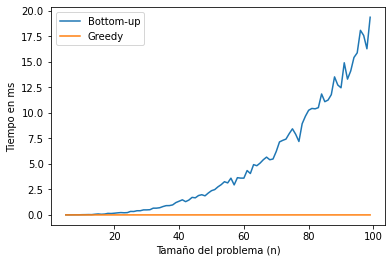

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(5,100):
    W, val, wt = knapsack_instance_generator(n)
    iteraciones = 0
    subproblemas = 0

    #la función repeat está ejecutando 10 veces KnapsackBottomUp y KnapsackGreedy con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import KnapsackBottomUp", stmt=f"KnapsackBottomUp({W}, {wt}, {val})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import KnapsackGreedy", stmt=f"KnapsackGreedy({W}, {wt}, {val})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Bottom-up", "Greedy"])

plt.xlabel('Tamaño del problema (n)')
plt.ylabel('Tiempo en ms')
plt.show()

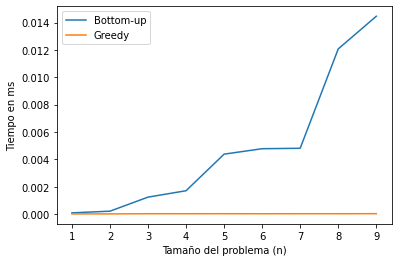

In [ ]:
## Menor n para notar mas la diferencia
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(1,10):
    W, val, wt = knapsack_instance_generator(n)
    iteraciones = 0
    subproblemas = 0

    #la función repeat está ejecutando 10 veces KnapsackBottomUp y KnapsackGreedy con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import KnapsackBottomUp", stmt=f"KnapsackBottomUp({W}, {wt}, {val})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import KnapsackGreedy", stmt=f"KnapsackGreedy({W}, {wt}, {val})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Bottom-up", "Greedy"])

plt.xlabel('Tamaño del problema (n)')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

El método **Greedy** es mucho más rápido que el **Bottom-up**, como cabría de esperar, ya que está diseñado de esa manera. 

Mientras que **Bottom-up** realiza y comprueba todos los posibles casos, combinaciones de artículos, valores para cuando se ponen más o menos artículos, toda posibilidad es encontrada y comparada para encontrar el valor máximo que se puede obtener al almacenar artículos dados en la mochila. Tiene muchísimos sub-problemas (muchos más que el tamaño del problema) y resuelve cada uno, esto hace que su tiempo de ejecución se extienda enormemente a medida que crece el tamaño del problema.

Por otro lado, está el método **Greedy** con un enfoque optimista y una idea ingenua, en este problema, asume que el elemento con menor peso estará en el conjunto de elementos que nos da el mayor precio, también asume que los pesos están ordenados y que, si un artículo no puede agregarse por su peso, el resto tampoco. Debido a la forma en que se aplica el generador de instancias, siempre hará $\frac{n}{2}$ comparaciones. Debido al poco proceso que realiza al asumir ingenuamente situaciones favorables, tiende a tener un tiempo de ejecución extremadamente bajo.

## **5.2. Problema de la mochila: SubProblemas(Bottom-up) vs Iteraciones(Greedy)**

### **Comparación de Gráficas** (SubProblemas vs Iteraciones)

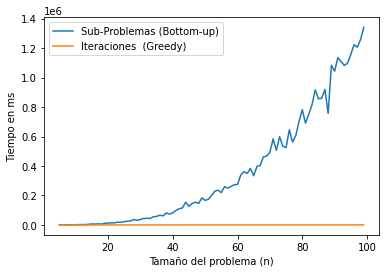

In [ ]:
import matplotlib.pyplot as plt

x=[]; y=[]; y1=[]

for n in range(5,100):
    W, val, wt = knapsack_instance_generator(n)

    iteraciones = 0
    subproblemas = 0

    valor = KnapsackBottomUp(W, wt, val)
    valor = KnapsackGreedy(W, wt, val)

    x.append(n)
    y.append(subproblemas)
    y1.append(iteraciones)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Sub-Problemas (Bottom-up)", "Iteraciones  (Greedy)"])

plt.xlabel('Tamaño del problema (n)')
plt.ylabel('Tiempo en ms')
plt.show()

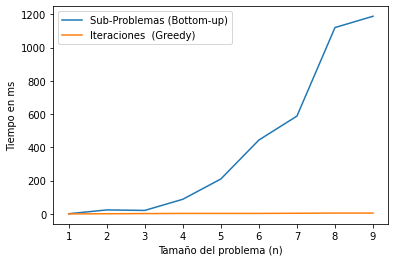

In [ ]:
## Menor n para notar mas la diferencia
import matplotlib.pyplot as plt

x=[]; y=[]; y1=[]

for n in range(1,10):
    W, val, wt = knapsack_instance_generator(n)

    iteraciones = 0
    subproblemas = 0

    valor = KnapsackBottomUp(W, wt, val)
    valor = KnapsackGreedy(W, wt, val)

    x.append(n)
    y.append(subproblemas)
    y1.append(iteraciones)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Sub-Problemas (Bottom-up)", "Iteraciones  (Greedy)"])

plt.xlabel('Tamaño del problema (n)')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

La cantidad de sub-problemas del método **Bottom-up** es mucho mayor a la cantidad de iteraciones del método **Greedy** .

En el análisis al comparar el tiempo de ejecución de ambos métodos para el problema, vimos que la cantidad de operaciones que realiza el **Greedy** es minima, mientras que la cantidad de sub-problemas que se deben resolver en el método **Bottom-up** es mayor incluso al tamaño del problema.

Podemos agregar una explicación de como crece el tamaño de iteraciones y sub-problemas:

* Iteraciones (**Greedy**):
  > Debido a que el algoritmo tiene un tiempo de ejecución O(n), debido a que solo recorrerá una vez cada uno de los $n$ articulo, cada vez que el tamaño del problema aumenta en uno, este aumenta sus posibles iteraciones en uno, aunque de la forma en que se generan los datos, siempre iterara hasta la mitad de los $n$ datos.

* Sub-problemas (**Bottom-up**):
  > Debido a que el algoritmo tiene un tiempo de ejecución O(n*W), cada vez crea una matriz con dimensiones $(n+1)$ x $(W+1)$, eso quiere decir que con cada aumento de tamaño del problema, debe agregar $n$ sub-problemas, además de una cantidad extra de sus problemas dependiendo del nuevo valor de $W$, pudiendo aumentar en casi en más de $100$ cuando a medida que el tamaño crece, puede incluso llegar a ser mucho mayor que $100$, agregando una enorme cantidad de sub-problemas cuando esto ocurre, y tiende a ocurrir que el nuevo $W$ es mayor que el anterior.

## **5.3. Resultados al Problema de la mochila: Bottom-up vs IteracionesGreedy**

### **Comparación Gráficas** (Resultados)

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *

def createDataFrame(n):
    x=[]; V=[]; tipo = []
    for i in range(10):
        W, val, wt = knapsack_instance_generator(5)

        iteraciones = 0
        subproblemas = 0

        valorB = KnapsackBottomUp(W, wt, val)
        valorG = KnapsackGreedy(W, wt, val)

        x.append(str(W) + "[kg] de\ncapacidad")
        V.append(valorB)
        tipo.append("Bottom-up")
        x.append(str(W) + "[kg] de\ncapacidad")
        V.append(valorG)
        tipo.append("Greedy")

    datos = {'Peso que soporta la mochila': x,
             'Tipo': tipo,
             'Valor': V}
    return pd.DataFrame(datos)

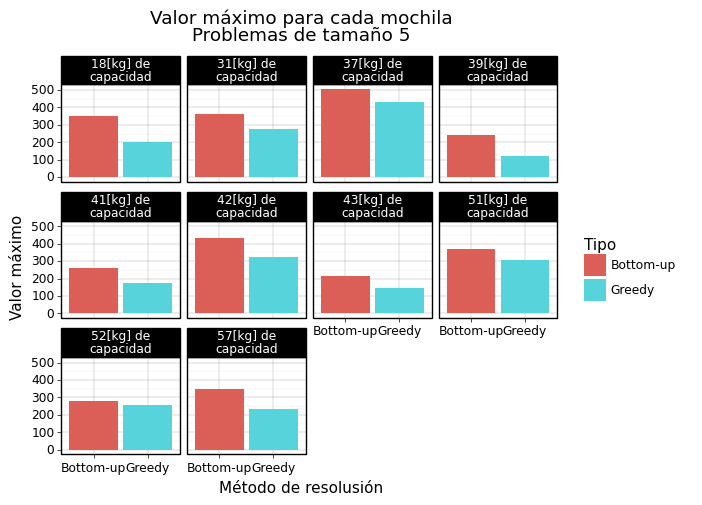

<ggplot: (8763145502345)>

In [ ]:
# Comparacion tamaño 5
(ggplot(createDataFrame(5))+
 aes(x='Tipo' , y='Valor', fill='Tipo')+
 geom_bar(stat="identity")+
 facet_wrap(['Peso que soporta la mochila'])+
 theme_linedraw()+
 labs(
     x="Método de resolusión",
     y="Valor máximo",
     title="Valor máximo para cada mochila\nProblemas de tamaño 5",
    )
)

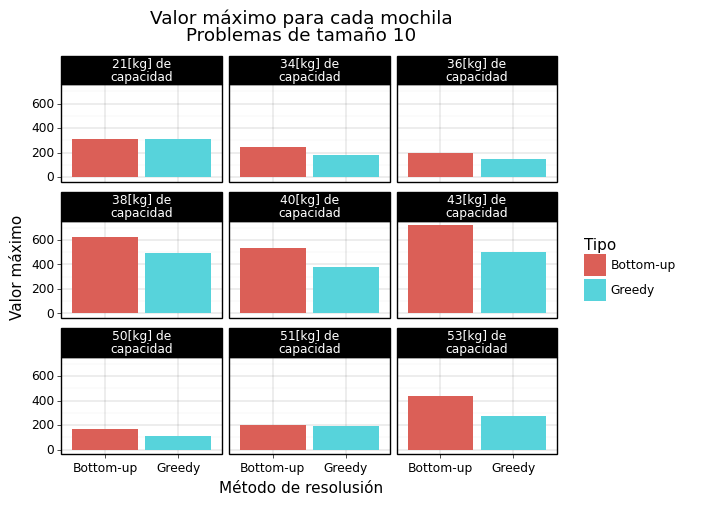

<ggplot: (8763145943621)>

In [ ]:
# Comparacion tamaño 10
(ggplot(createDataFrame(10))+
 aes(x='Tipo' , y='Valor', fill='Tipo')+
 geom_bar(stat="identity")+
 facet_wrap(['Peso que soporta la mochila'])+
 theme_linedraw()+
 labs(
     x="Método de resolusión",
     y="Valor máximo",
     title="Valor máximo para cada mochila\nProblemas de tamaño 10",
    )
)

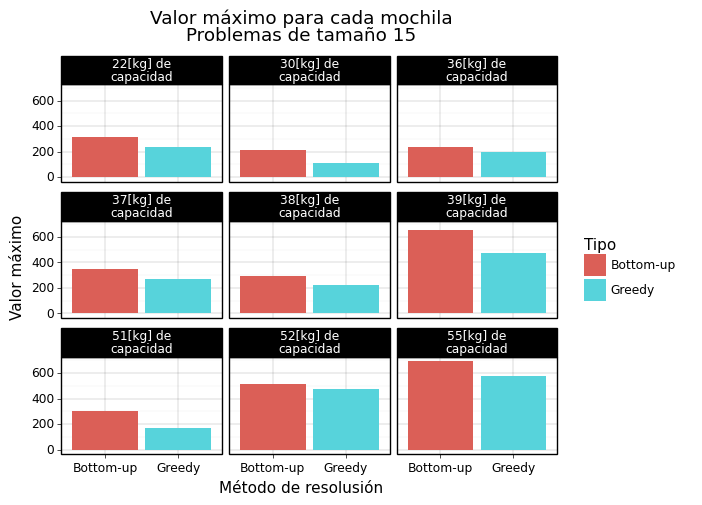

<ggplot: (8763146045997)>

In [ ]:
# Comparacion tamaño 15
(ggplot(createDataFrame(15))+
 aes(x='Tipo' , y='Valor', fill='Tipo')+
 geom_bar(stat="identity")+
 facet_wrap(['Peso que soporta la mochila'])+
 theme_linedraw()+
 labs(
     x="Método de resolusión",
     y="Valor máximo",
     title="Valor máximo para cada mochila\nProblemas de tamaño 15",
    )
)

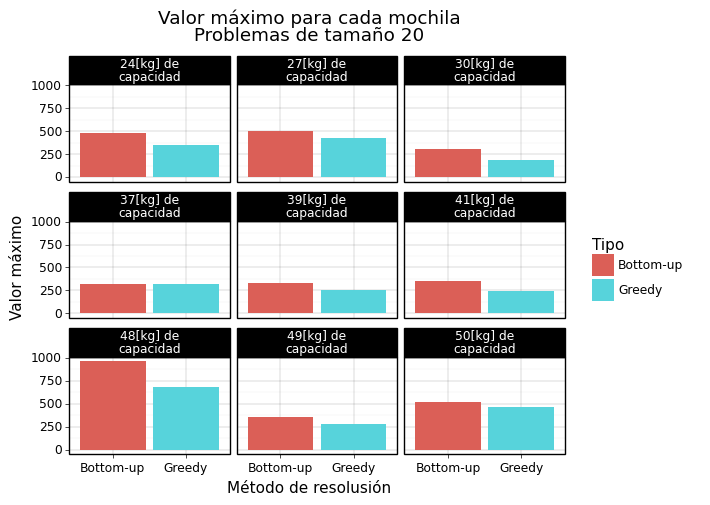

<ggplot: (8763145104953)>

In [ ]:
# Comparacion tamaño 20
(ggplot(createDataFrame(20))+
 aes(x='Tipo' , y='Valor', fill='Tipo')+
 geom_bar(stat="identity")+
 facet_wrap(['Peso que soporta la mochila'])+
 theme_linedraw()+
 labs(
     x="Método de resolusión",
     y="Valor máximo",
     title="Valor máximo para cada mochila\nProblemas de tamaño 20",
    )
)

### **Análisis de resultados**

Se puede ver que para una mochila con un peso definido el valor máximo obtenido por el método **Greedy** nunca será mayor al obtenido por **Bottom-up**. Generalmente el **Bottom-up** es mayor, y como vimos previamente es correcto, es decir, da la respuesta que corresponde, como se conoce la correctitud del **Bottom-up**, podemos notar que el **Greedy** no da la respuesta correcta en la mayoría de los casos independientemente del tamaño del problema. A veces incluso da respuesta sumamente lejanas.

En los análisis anteriores vimos las diferencias en sus procesos lo que afecta su tiempo de ejecución y su trabajo. Es debido a estas diferencias que los resultados son desiguales. 

* **Bottom-up** comprueba todas las posibles combinaciones de artículos que se puedes guardar en la mochila, y con esos datos construye el valor máximo que se le puede atribuir a la mochila.
* **Greedy** asume un único caso que cree ingenuamente que siempre se cumplirá y sigue un proceso más simple y rápido para llegar al resultado, pero el problema no tiene ese único caso y ese caso casi nunca se cumple con el generador de instancia aplicado.

Debido a estas diferencias el valor óptimo que entrega cada 1 es diferente.
